# 국민연금 가입자 조회 

In [22]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

In [23]:
# 한글폰트 설정
from matplotlib import font_manager, rc
import platform
try : 
    if platform.system() == 'Windows':
    # 윈도우인 경우
        font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
        rc('font', family=font_name)
    else:    
    # Mac 인 경우
        rc('font', family='AppleGothic')
except : 
    pass
plt.rcParams['axes.unicode_minus'] = False  

In [24]:
base_path = r'D:\NLP2501\dataset'

In [25]:
df = pd.read_csv(os.path.join(base_path, 'national-pension.csv'), encoding='cp949')

df.head(3)

,자료생성년월,사업장명,사업자등록번호,사업장가입상태코드 1 등록 2 탈퇴,우편번호,사업장지번상세주소,사업장도로명상세주소,고객법정동주소코드,고객행정동주소코드,법정동주소광역시도코드,...,사업장형태구분코드 1 법인 2 개인,사업장업종코드,사업장업종코드명,적용일자,재등록일자,탈퇴일자,가입자수,당월고지금액,신규취득자수,상실가입자수
0,2025-04,우성기전(주),126811,1,12816,경기도 광주시 도척면,경기도 광주시 도척면 도척윗로,4161033025,4161033025,41,...,1,292201,동력식 수지 공구 제조업,1988-01-01,NaN,NaN,4,809160,0,0
1,2025-04,희성전자(주),106810,1,04410,서울특별시 용산구 한남동,서울특별시 용산구 독서당로14길,1117013100,1117067000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,322,170213320,1,6
2,2025-04,디에스디엘(주),104811,1,04526,서울특별시 중구 남대문로4가,서울특별시 중구 세종대로,1114011700,1114054000,11,...,1,701201,비주거용 건물 임대업(점포 자기땅),1988-01-01,NaN,NaN,16,5291340,1,1




|                          변경 전 | 변경 후                 |
| -------------------------------: | ----------------------- |
|                     자료생성년월 | **삭제**                |
|                         사업장명 | 사업장명                |
|                   사업자등록번호 | 사업자등록번호          |
| 사업장가입상태코드 1 등록 2 탈퇴 | 가입상태                |
|                         우편번호 | **우편번호**            |
|               사업장지번상세주소 | **삭제**                |
|             사업장도로명상세주소 | 주소                    |
|               고객법정동주소코드 | **삭제**                |
|               고객행정동주소코드 | **삭제**                |
|           법정동주소광역시도코드 | 시도코드                |
|       법정동주소광역시시군구코드 | 시군구코드              |
| 법정동주소광역시시군구읍면동코드 | 읍면동코드              |
| 사업장형태구분코드 1 법인 2 개인 | **삭제**                |
|                   사업장업종코드 | 업종코드                |
|                 사업장업종코드명 | 업종코드명              |
|                         적용일자 | **삭제**                |
|                       재등록일자 | **삭제**                |
|                         탈퇴일자 | 탈퇴일자                |
|                         가입자수 | 가입자수                |
|                     당월고지금액 | 금액                    |
|                     신규취득자수 | 신규                    |
|                     상실가입자수 | 상실                    |



In [26]:
# 코드를 입력해 주세요
df.columns = [
    '자료생성년월', '사업장명', '사업자등록번호', '가입상태', '우편번호',
    '사업장지번상세주소', '주소', '고객법정동주소코드', '고객행정동주소코드', 
    '시도코드', '시군구코드', '읍면동코드', 
    '사업장형태구분코드 1 법인 2 개인', '업종코드', '업종코드명', 
    '적용일자', '재등록일자', '탈퇴일자',
    '가입자수', '금액', '신규', '상실'
]
df = df.drop(['자료생성년월', '우편번호', '사업장지번상세주소', '고객법정동주소코드', '고객행정동주소코드', '사업장형태구분코드 1 법인 2 개인', '적용일자', '재등록일자'], axis=1)
df.head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,우성기전(주),126811,1,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,NaN,4,809160,0,0
1,희성전자(주),106810,1,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),NaN,322,170213320,1,6
2,디에스디엘(주),104811,1,서울특별시 중구 세종대로,11,140,117,701201,비주거용 건물 임대업(점포 자기땅),NaN,16,5291340,1,1
3,(주)헤럴드,104810,1,서울특별시 용산구 후암로4길,11,170,101,221200,잡지 및 정기 간행물 발행업,NaN,319,133662320,0,2
4,천일해운(주),105816,1,서울특별시 용산구 대사관로12길,11,170,131,519113,상품 종합 도매업,NaN,9,2664040,2,0


## 사업자명 클린징

- (주) 가 포함된 사업장명

In [27]:
df.loc[df['사업장명'].str.contains('\(주\)')].head()

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
0,우성기전(주),126811,1,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,NaN,4,809160,0,0
1,희성전자(주),106810,1,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),NaN,322,170213320,1,6
2,디에스디엘(주),104811,1,서울특별시 중구 세종대로,11,140,117,701201,비주거용 건물 임대업(점포 자기땅),NaN,16,5291340,1,1
3,(주)헤럴드,104810,1,서울특별시 용산구 후암로4길,11,170,101,221200,잡지 및 정기 간행물 발행업,NaN,319,133662320,0,2
4,천일해운(주),105816,1,서울특별시 용산구 대사관로12길,11,170,131,519113,상품 종합 도매업,NaN,9,2664040,2,0


In [28]:
# Regular Expression(정규화) 모듈 사용
import re

pattern1 = '(\([^)]+\))'
re.sub(pattern1, '', '우성전기(주)')

'우성전기'

- [주] 가 포함된 사업장명

In [29]:
pattern2 = '(\[[^)]+\])'
re.sub(pattern2, '', '에스티테크[주]')

'에스티테크'

- 사업장명에 / 가 포함된 경우 

In [30]:
df.loc[df['사업장명'].str.contains('\/')].head(10)

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
919,(주)동양/건재부문,101853,1,서울특별시 영등포구 국제금융로2길,11,560,110,269401,시멘트 제조업,NaN,295,143202700,1,3
2103,재우교통/주,205812,1,서울특별시 마포구 가양대로,11,440,127,602201,택시 운송업,NaN,3,823400,0,0
4765,(주)한영파트너스FH/월드컵현대아파트,138810,1,서울특별시 서대문구 수색로,11,410,119,702003,비주거용 부동산 관리업,NaN,3,983400,0,0
16837,의료법인해정의료재단/더좋은병원,502821,1,대구광역시 수성구 명덕로,27,260,105,851101,요양병원,NaN,205,50726580,11,6
20023,사)강원도지체장애인협회고성군지회/장애인종합상담실/편의,227826,1,강원특별자치도 고성군 간성읍 간성로30번길,51,820,250,999999,BIZ_NO미존재사업장,NaN,3,918520,0,0
20871,안산시청(의료급여사례관리/통합돌봄과),134830,1,경기도 안산시 단원구 화랑로,41,273,101,701201,비주거용 건물 임대업(점포 자기땅),NaN,5,1511800,0,0
21347,(주)영일에이치오엠/이동그린빌명품,506811,1,경상북도 포항시 남구 대이로,47,111,117,749300,건축물 일반 청소업,NaN,3,834280,0,1
23859,전용부품판매/주,204817,1,서울특별시 동대문구 전농로4길,11,230,105,503003,자동차 중고 부품 및 내장품 판매업,NaN,3,983700,0,0
25265,민현건설(주)/본사,507810,1,대전광역시 서구 대덕대로,30,170,113,452102,유리 및 창호 공사업,NaN,3,376360,0,0
25767,중앙산업(자)/생활폐기물 수집운반 대행사업,138810,1,경기도 의왕시 부곡중앙북9길,41,430,103,900100,지정 외 폐기물 수집 운반업,NaN,9,2716900,0,0


- 그 밖의 특수 문자 제거 

In [31]:
pattern3 = '[^A-Za-z0-9가-힣]'
result = re.sub(pattern3, ' ', '*^%$^의료법인%해정^&*****%!@의료재단/더/좋은/병원')
result = re.sub(' +', ' ', result)
result

' 의료법인 해정 의료재단 더 좋은 병원'

In [32]:
# 검증코드 (변경전)
df.loc[[143146, 4765, 24109, 23092, 546000]]

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
143146,연안알루미늄(주),136812,1,경기도 김포시 대곶면 대곶남로,41,570,340,369301,체조 육상 및 체력 단련용 장비 제조업,NaN,40,13605100,0,3
4765,(주)한영파트너스FH/월드컵현대아파트,138810,1,서울특별시 서대문구 수색로,11,410,119,702003,비주거용 부동산 관리업,NaN,3,983400,0,0
24109,상상시티주식회사,303813,1,강원특별자치도 춘천시 춘천로,51,110,112,452102,유리 및 창호 공사업,NaN,5,1462120,0,0
23092,(주)삼성공조설비,504811,1,대구광역시 북구 검단공단로21길,27,230,113,452104,배관 및 냉ㆍ난방 공사업,NaN,7,2437980,0,0
546000,주식회사 한성정공,552860,1,경기도 안산시 단원구 당쟁이로,41,273,103,292903,주형 및 금형 제조업,NaN,4,1228500,4,0


In [33]:
# 코드를 입력해 주세요
def preprocessing(x):
    x = re.sub(pattern1, '', x)
    x = re.sub(pattern2, '', x)
    x = re.sub(pattern3, ' ', x)
    x = re.sub(' +', ' ', x)
    return x

df['사업장명'] = df['사업장명'].apply(preprocessing)

In [34]:
# 검증코드 (변경후)
df.loc[[143146, 4765, 24109, 23092, 546000]]

,사업장명,사업자등록번호,가입상태,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,탈퇴일자,가입자수,금액,신규,상실
143146,연안알루미늄,136812,1,경기도 김포시 대곶면 대곶남로,41,570,340,369301,체조 육상 및 체력 단련용 장비 제조업,NaN,40,13605100,0,3
4765,한영파트너스FH 월드컵현대아파트,138810,1,서울특별시 서대문구 수색로,11,410,119,702003,비주거용 부동산 관리업,NaN,3,983400,0,0
24109,상상시티주식회사,303813,1,강원특별자치도 춘천시 춘천로,51,110,112,452102,유리 및 창호 공사업,NaN,5,1462120,0,0
23092,삼성공조설비,504811,1,대구광역시 북구 검단공단로21길,27,230,113,452104,배관 및 냉ㆍ난방 공사업,NaN,7,2437980,0,0
546000,주식회사 한성정공,552860,1,경기도 안산시 단원구 당쟁이로,41,273,103,292903,주형 및 금형 제조업,NaN,4,1228500,4,0


# 분석
2025년도에 탈퇴한 기업의 월별 탈퇴수를 bar 그래프로 시각화 

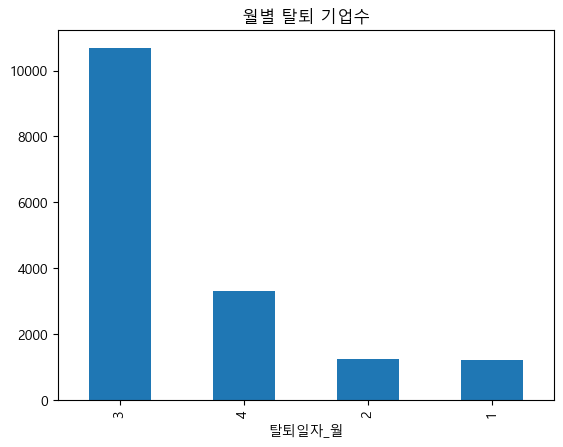

In [35]:
# 코드를 입력해 주세요
df['탈퇴일자_연도'] =  pd.to_datetime(df['탈퇴일자']).dt.year
df['탈퇴일자_월'] =  pd.to_datetime(df['탈퇴일자']).dt.month
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2025), '탈퇴일자_월'].astype('int').value_counts().plot(kind='bar')
plt.title('월별 탈퇴 기업수')
plt.show()


In [36]:
df['시도'] = df['주소'].str.split(' ').str[0]

In [37]:
df['시도'] = df['주소'].str.split(' ').str[0]
df.loc[(df['가입상태'] == 2) & (df['탈퇴일자_연도'] == 2025) & (df['시도'].apply(lambda x: len(x.strip())) > 0), '시도'].value_counts().plot(kind='bar')
plt.title('시도별 탈퇴 기업 수')
plt.xticks(rotation=60)
plt.show()

AttributeError: 'float' object has no attribute 'strip'

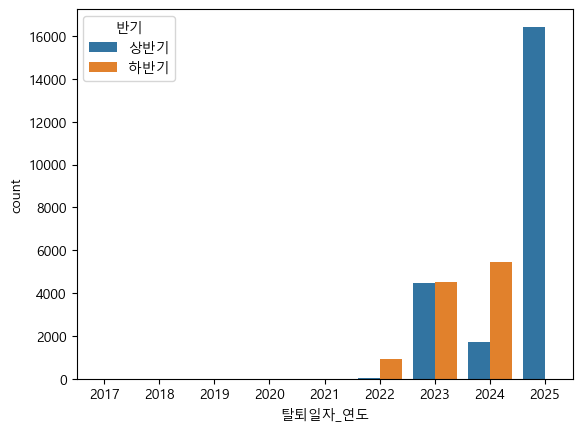

In [38]:
# 코드를 입력해 주세요
cond1 = (df['가입상태'] == 2) & (df['탈퇴일자_연도'] >= 2017) & (df['탈퇴일자_연도'] <= 2025)
tmp = df.loc[cond1].copy()
tmp['반기'] = np.where(tmp['탈퇴일자_월'] <= 6, '상반기', '하반기')
tmp['탈퇴일자_연도'] = tmp['탈퇴일자_연도'].astype('int')
sns.countplot(x='탈퇴일자_연도', hue='반기', data=tmp)
df = df.drop(['탈퇴일자_연도', '탈퇴일자_월','시도'], axis=1)
plt.show()

In [39]:
# 코드를 입력해 주세요
df = df.loc[df['가입상태'] == 1].drop(['가입상태', '탈퇴일자'], axis=1).reset_index(drop=True)
print(f'shape: {df.shape[0]} 행')
df.head()

shape: 512488 행


,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실
0,우성기전,126811,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,4,809160,0,0
1,희성전자,106810,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),322,170213320,1,6
2,디에스디엘,104811,서울특별시 중구 세종대로,11,140,117,701201,비주거용 건물 임대업(점포 자기땅),16,5291340,1,1
3,헤럴드,104810,서울특별시 용산구 후암로4길,11,170,101,221200,잡지 및 정기 간행물 발행업,319,133662320,0,2
4,천일해운,105816,서울특별시 용산구 대사관로12길,11,170,131,519113,상품 종합 도매업,9,2664040,2,0


# 핵심 데이터 column 추출 

- 수도권(서울, 경기도) 소재의 기업을 대상으로 합니다.
- `가입자수`를 기준으로 내림차순 정렬하여 bar 그래프를 출력합니다.
- 출력되는 사업장명은 상위 20개만 출력합니다.

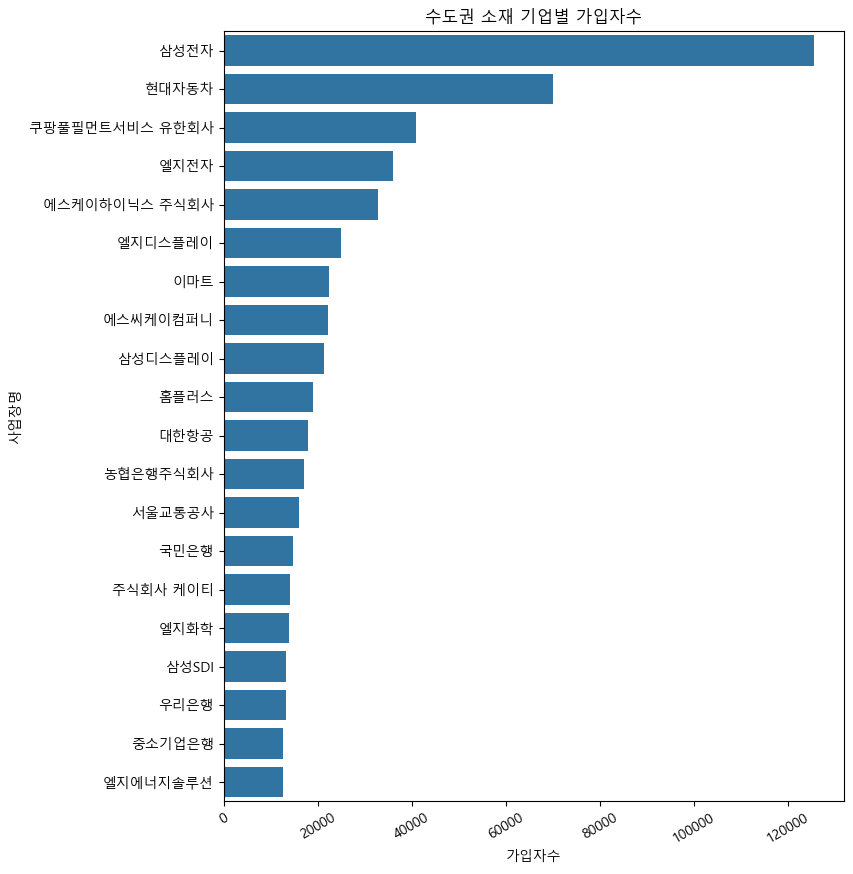

In [40]:
# 코드를 입력해 주세요
plt.figure(figsize=(8, 10))
tmp = df.loc[df['시도코드'].isin([11, 41]), ['사업장명', '가입자수']].sort_values('가입자수', ascending=False).head(20).reset_index()
sns.barplot(y='사업장명', x='가입자수', data=tmp)
plt.xticks(rotation=30)
plt.title('수도권 소재 기업별 가입자수')
plt.show()

### 국민연금 납부액으로 기업별 평균 연봉 추정

국민연금 보험률은 9%입니다. 쉽게 이야기 하면 급여(신고소득월액)의 9%를 국민연금으로 내는 것입니다. 

하지만 이를 절반으로 나누어 **4.5%는 회사가, 나머지 절반은 개인이 부담하는 구조**입니다. 회사는 급여 외에 추가로 금액을 부담합니다.

국민연금 보험료는 **소득 상한선과 하한선이 설정되어 있어 소득 전체가 아닌 일부 소득에만 부과**됩니다.

이를 역산하면 신고소득월액의 계산이 가능합니다. 하지만 **상한선과 하한선이 설정되어 있어 실제보다 과소계산**될 수 있습니다

[수식]

- 인당금액 = 금액 / 가입자수
- 월급여추정 = 인당금액 / 9% * 100%
- 연간급여추정 = 임직원 평균 월급 * 12개월

- 금액을 가입자수로 나눈 금액을 산출하여 `인당금액`을 먼저 산출합니다.
- `월급여추정`은 `인당금액` / 9% * 100% 한 값입니다.
- `월급여추정`을 x12한 값을 `연간급여추정`에 대입합니다.
- `가입자수` 기준 1000명을 초과하는 기업(중견기업)을 필터링 합니다.
- 출력시 `사업장명`, `가입자수`, `월급여추정`, `연간급여추정` 컬럼만 출력합니다.
- `연간급여추정`와 `가입자수`를 기준으로 내림차순하여 상위 10개 기업을 출력합니다.

In [41]:
# 코드를 입력해 주세요
df['인당금액'] = df['금액'] / df['가입자수']
df['월급여추정'] =  df['인당금액'] / 9 * 100
df['연간급여추정'] = df['월급여추정'] * 12

cond = (df['가입자수'] > 1000)
df.sort_values(['연간급여추정', '가입자수'], ascending=False).loc[cond, ['사업장명', '가입자수', '월급여추정', '연간급여추정']].head(10)

,사업장명,가입자수,월급여추정,연간급여추정
6109,기아 영업본부,2125,6.170000e+06,7.404000e+07
6190,기아 정비본부,1156,6.165546e+06,7.398655e+07
90847,현대제철포항1공장,1438,6.160392e+06,7.392470e+07
3237,주식회사 현대케피코,1745,6.160312e+06,7.392374e+07
203983,부산항만산업협회 화물고정업,1113,6.155612e+06,7.386734e+07
84287,현대제철주식회사,1557,6.125575e+06,7.350690e+07
135943,현대위아,2879,6.125066e+06,7.350080e+07
180263,삼성디스플레이,21348,6.122800e+06,7.347360e+07
41199,현대제철주식회사당진공장,6674,6.115963e+06,7.339155e+07
15465,한국지엠주식회사,7741,6.109669e+06,7.331603e+07


### 업종별 가입자수 순유입 산정

- `순유입`은 `신규` - `상실` 로 정의합니다.
- `업종코드명`별 순유입의 합산을 구한 후 상위 20개 `업종코드명`에 대하여 bar 그래프로 출력합니다.
- `순유입` 기준으로 내림차순 정렬합니다.

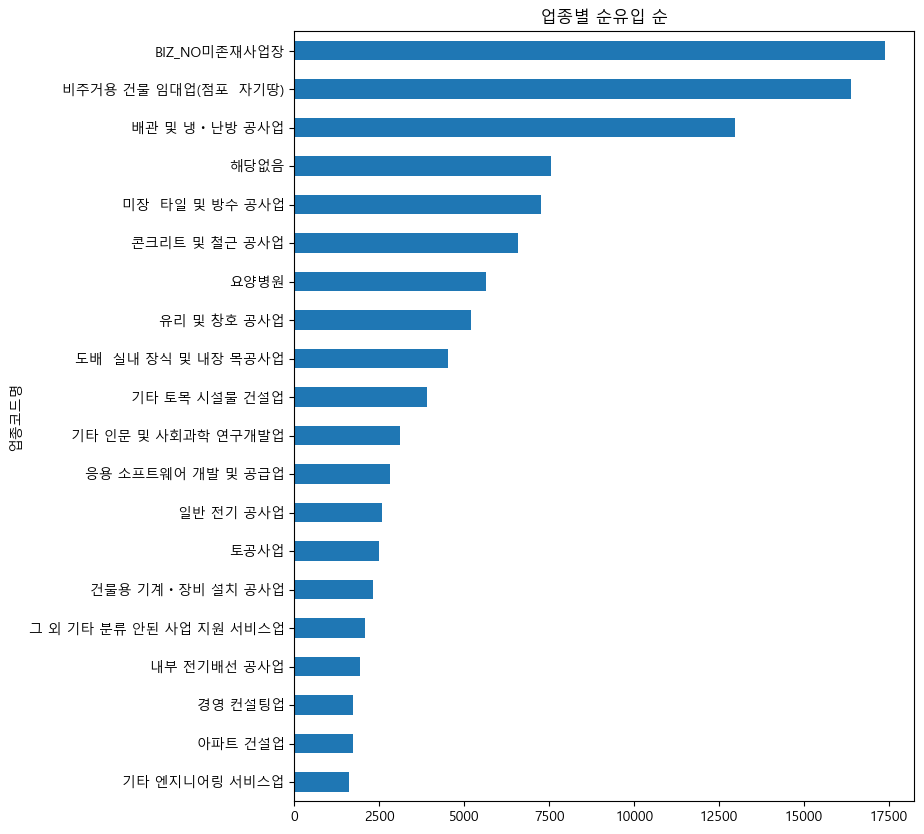

In [42]:
# 코드를 입력해 주세요
plt.figure(figsize=(8, 10))
df['순유입'] = df['신규'] - df['상실']
df.groupby('업종코드명')['순유입'].sum().sort_values(ascending=False).head(20).sort_values().plot(kind='barh')
plt.title('업종별 순유입 순')
plt.show()

## 함수들 정의 

- 사업자명을 검색한 후 결과를 return하는 함수를 완성합니다.
- 함수명은 `find_company` 입니다.
- 매개변수 contains: 
          True인 경우: string의 `contains`를 사용하여 포함하는 모든 회사를 찾습니다.
          False인 경우: 정확히 일치하는 사업장명만 찾습니다.
          
- `def find_company(company_name, contains)`
- `['사업장명', '월급여추정', '연간급여추정', '업종코드']` 정보를 보여주는 DataFrame을 return 합니다.

In [43]:
df.head()

,사업장명,사업자등록번호,주소,시도코드,시군구코드,읍면동코드,업종코드,업종코드명,가입자수,금액,신규,상실,인당금액,월급여추정,연간급여추정,순유입
0,우성기전,126811,경기도 광주시 도척면 도척윗로,41,610,330,292201,동력식 수지 공구 제조업,4,809160,0,0,202290.000000,2.247667e+06,2.697200e+07,0
1,희성전자,106810,서울특별시 용산구 독서당로14길,11,170,131,701201,비주거용 건물 임대업(점포 자기땅),322,170213320,1,6,528612.795031,5.873476e+06,7.048171e+07,-5
2,디에스디엘,104811,서울특별시 중구 세종대로,11,140,117,701201,비주거용 건물 임대업(점포 자기땅),16,5291340,1,1,330708.750000,3.674542e+06,4.409450e+07,0
3,헤럴드,104810,서울특별시 용산구 후암로4길,11,170,101,221200,잡지 및 정기 간행물 발행업,319,133662320,0,2,419004.137931,4.655602e+06,5.586722e+07,-2
4,천일해운,105816,서울특별시 용산구 대사관로12길,11,170,131,519113,상품 종합 도매업,9,2664040,2,0,296004.444444,3.288938e+06,3.946726e+07,2


In [44]:
# 코드를 입력해 주세요
def find_company(company_name, contains):
    if contains:
        return df.loc[df['사업장명'].str.contains(company_name), ['사업장명', '월급여추정', '연간급여추정', '업종코드', '가입자수']]\
              .sort_values('가입자수', ascending=False)
    else:
        return df.loc[df['사업장명']==company_name, ['사업장명', '월급여추정', '연간급여추정', '업종코드', '가입자수']]\
              .sort_values('가입자수', ascending=False)

In [45]:
# 동작확인
find_company('에스케이텔레콤', True)

,사업장명,월급여추정,연간급여추정,업종코드,가입자수
3231,에스케이텔레콤,5.839586e+06,7.007503e+07,642001,5440
337469,에스케이텔레콤씨에스티원,3.994892e+06,4.793870e+07,924101,74
387242,에스케이텔레콤 주 상용 4단계 운항통신시설 구매설치사업,3.655630e+06,4.386756e+07,642001,12
501600,에스케이텔레콤 주 상용 오픈 이노베이션 지향 Lv 4 4 자율주행 리빙랩 구축사업,5.969689e+06,7.163627e+07,642001,10
416562,에스케이텔레콤 상용 경북 사업장 형태선LTE R,5.946222e+06,7.135467e+07,642001,4
224329,에스케이텔레콤 철원동송대리점,3.571630e+06,4.285956e+07,515060,3
125315,주식회사 에스케이텔레콤봉화대리점,2.444963e+06,2.933956e+07,523323,3


In [46]:
find_company('에스케이텔레콤', False)

,사업장명,월급여추정,연간급여추정,업종코드,가입자수
3231,에스케이텔레콤,5.839586e+06,7.007503e+07,642001,5440


- 사업장명을 입력하면 사업장명과 정확히 일치하는 회사를 찾습니다. (find_company 함수 사용)
- 함수명은 `compare_company` 입니다.
- 매개변수명은 `company_name` 으로 지정하세요
- `def compare_company(company_name)`

기능
- find_company로 부터 return 된 DataFrame의 업종코드와 동일한 회사를 모두 찾습니다.
- 동일한 회사의 `월급여추정`, `연간급여추정`에 대한 ['mean', 'count', 'min', 'max']를 산출합니다.

return 되는 DataFrame은 다음과 같이 구성합니다.
- index: `월급여추정` -> `업종_월급여추정`, `연간급여추정` -> `업종_연간급여추정`으로 변경합니다.
- 컬럼은 평균, 개수, 최소, 최대로 컬럼명을 변경 후 맨 끝열에는 찾은 회사명 컬럼을 추가하고, `월급여추정`, `연간급여추정` 데이터를 기입합니다.


In [47]:
def company_info(company_name):
    company = find_company(company_name, True)
    return df.loc[company.iloc[0].name]

In [48]:
info = company_info('에스케이텔레콤')
info

사업장명               에스케이텔레콤
사업자등록번호             104813
주소            서울특별시 중구 을지로
시도코드                    11
시군구코드                  140
읍면동코드                  105
업종코드                642001
업종코드명          무선 및 위성 통신업
가입자수                  5440
금액              2859061320
신규                      46
상실                      31
인당금액         525562.742647
월급여추정       5839586.029412
연간급여추정     70075032.352941
순유입                     15
Name: 3231, dtype: object

In [49]:
# 코드를 입력해 주세요
def compare_company(company_name):
    company = find_company(company_name, True)
    code = company['업종코드'].iloc[0]
    df1 =df.loc[df['업종코드'] == code, ['월급여추정', '연간급여추정']].agg(['mean', 'count', 'min', 'max'])
    df1.columns = ['업종_월급여추정', '업종_연간급여추정']
    df1 = df1.T
    df1.columns = ['평균', '개수', '최소', '최대']
    df1.loc['업종_월급여추정', company_name] = company['월급여추정'].values[0]
    df1.loc['업종_연간급여추정', company_name] = company['연간급여추정'].values[0]
    return df1

In [50]:
# 확인
result = compare_company('삼성전자')
result

,평균,개수,최소,최대,삼성전자
업종_월급여추정,3.371431e+06,428.0,5.689727e+05,6.122800e+06,5.906772e+06
업종_연간급여추정,4.045717e+07,428.0,6.827673e+06,7.347360e+07,7.088127e+07


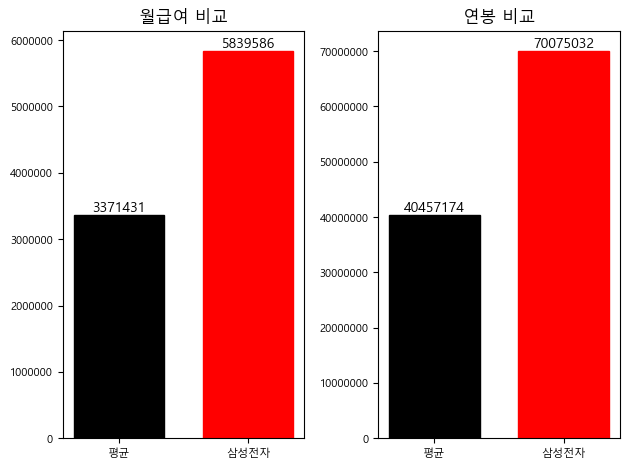

In [52]:
fig, ax = plt.subplots(1, 2)

p1 = ax[0].bar(x=['평균', '삼성전자'], height=(result.iloc[0, 0], info['월급여추정']), width=0.7)
ax[0].bar_label(p1, fmt='%d')
p1[0].set_color('black')
p1[1].set_color('red')
ax[0].ticklabel_format(style='plain', axis='y')
ax[0].set_title('월급여 비교')

p2 = ax[1].bar(x=['평균', '삼성전자'], height=(result.iloc[1, 0], info['연간급여추정']), width=0.7)
p2[0].set_color('black')
p2[1].set_color('red')
ax[1].bar_label(p2, fmt='%d')
ax[1].ticklabel_format(style='plain', axis='y')
ax[1].set_title('연봉 비교')

ax[0].tick_params(axis='both', which='major', labelsize=8, rotation=0)
ax[0].tick_params(axis='both', which='minor', labelsize=6)
ax[1].tick_params(axis='both', which='major', labelsize=8)
ax[1].tick_params(axis='both', which='minor', labelsize=6)

plt.tight_layout()